# 3. Statistics for Data Analysis: R Exercises

## Exercise 1 

Download from the KEATS page the ﬁle plant_class.txt which contains the size class (from very low to very high) identiﬁed for plants from three diﬀerent types (trt1,trt2,trt3). You can import the data in R with

``` data<-read.table("plant_class.txt",header=TRUE) ```

and look at the ﬁrst few rows with:

``` head(data) ```

1. Compute the __absolute__ and __relative bi-dimensional frequency tables__ for these data (look at the help for the table command). 

2. Compute and represent __graphically__ the __marginal relative frequency tables__ for __plant type__ and the __size__. 

3. Compute and represent __graphically__ the __conditional relative frequency tables__ for the __size given the plant type__. 

4. Compute and represent __graphically__ the __conditional relative frequency tables__ for the __plant type given the size__. 

5. You are now told that the __size__ classes correspond to the following __weight intervals__: 

    * Very low = [0,3.5]
    * low = [3.5,4.5]
    * medium= [4.5,5.5]
    * high= [5.5,6]
    * very high= [6,10]

Compute the approximate __mean weight__ and the approximate __conditional mean weight given that the plant type is trt1__.


### Load Plants Dataset

In [1]:
data<-read.table("data/plant_class.txt",header=TRUE)  # Load data
head(data)  # Peek at data

type,size
trt3,low
trt3,high
trt3,medium
trt3,very high
trt3,medium
trt3,medium


# 1. Frequency Tables

This section will provide several frequency tables for the plants class/size dataset.

In [2]:
help(table)  # Look at the documentation for the table command

## 1.1 Absolute Frequency

In [3]:
table(data)  # Absolute frequency table

      size
type   high low medium very high
  trt1    1   5      3         1
  trt2    3   0      5         2
  trt3    1   1      7         1

## 1.2 Relative Bi-dimensional Frequency

Bi-dimensional refers to something that has 2 variables, in this case these are: __type__ and __size__. 

In [4]:
prop.table(table(data))  # Relative bi-dimensional table

      size
type         high        low     medium  very high
  trt1 0.03333333 0.16666667 0.10000000 0.03333333
  trt2 0.10000000 0.00000000 0.16666667 0.06666667
  trt3 0.03333333 0.03333333 0.23333333 0.03333333

A relative frequency table is one in which each entry cell is divided by the sum total absolute frequency of the entire table.

In [5]:
nrow(data)

[1] 30

There are 30 rows in the data, and since each row consists of exactly 1 datapoint - the sum total number of datapoints are 30. The relative frequency table can thus be obtained by dividing the absolute frequency by the sum total: 30. 

e.g., for the first cell: type=trt1, and size=high: ...

## 1.3 Marginal Relative Frequency

Marginal frequenices are essentially the __sum total frequency__ for a given variable. In this case, we would sum across the rows to determine the marginal distributions (sum total) for each given plant type, and sum across the columns to determine the marginal distributions for the size of the plants.

Let's see how this would look in practice.

First, let us determine the ___absolute_ marginal distributions__ for both variables:

In [6]:
margin.table(table(data), margin=1)  # Plant type absolute marginal distribution

type
trt1 trt2 trt3 
  10   10   10 

In [7]:
margin.table(table(data), margin=2)  # Plant size absolute marginal distribution

size
     high       low    medium very high 
        5         6        15         4 

Now, let us determine the ___relative_ marginal distributions__:

In [8]:
prop.table(margin.table(table(data), margin=1))  # Plant type relative marginal distribution

type
     trt1      trt2      trt3 
0.3333333 0.3333333 0.3333333 

In [9]:
prop.table(margin.table(table(data), margin=2))  # Plant size relative marginal distribution

size
     high       low    medium very high 
0.1666667 0.2000000 0.5000000 0.1333333 

Let us __visualize these relative marginal distributions__:

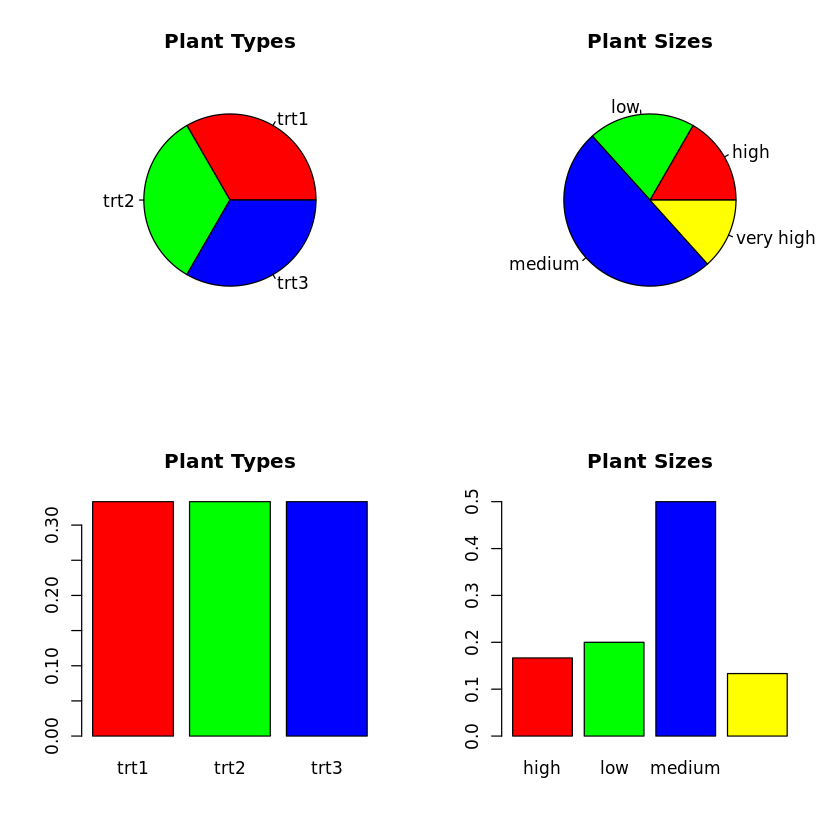

In [10]:
par(mfrow = c(2,2))  # Dimensions for how the plots are displayed
colours = c('red','green','blue','yellow')  # Colours used in the plots

pie(prop.table(margin.table(table(data), margin=1)), main='Plant Types', col=colours)  # Pie chart of plant type
pie(prop.table(margin.table(table(data), margin=2)), main='Plant Sizes', col=colours)  # Pie chart of plant size
barplot(prop.table(margin.table(table(data), margin=1)), main='Plant Types', col=colours)  # Pie chart of plant type
barplot(prop.table(margin.table(table(data), margin=2)), main='Plant Sizes', col=colours)  # Pie chart of plant size

Here we see that the plant type class is perfectly balanced, with an equal proportion of each plant type relative to the other types. For the plant size, we see that half of the plants in the dataset are medium sized, and the other sizes are fairly close in relative frequency to each other. The most rare sized plant in this dataset are the 'very high' sized plants. 

## 1.4 Conditional Relative Frequency

Here we will answer both question 3 and 4. That is, we will compute the conditional relative frequency tables for the:
1. size given the plant type
2. plant type given the size

Conditional relative frequencies tell us the relative frequencies for datapoints that are a certain value of one variable, given that they have a value of another type of variable.

#### 1.4.1 Size Given the Plant Type

To begin, let us get some previous information to get us started with this section.

In [11]:
table(data)  # Absolute frequency

      size
type   high low medium very high
  trt1    1   5      3         1
  trt2    3   0      5         2
  trt3    1   1      7         1

In [12]:
margin.table(table(data), margin=1)  # Marginal absolute frequency: plant type 

type
trt1 trt2 trt3 
  10   10   10 

In [13]:
margin.table(table(data), margin=2)  # Marginal absolute frequency: plant size

size
     high       low    medium very high 
        5         6        15         4 

Here, I will briefly give some concrete examples of conditional relative frequencies of size given the plant types. 
1. For example, since there are only $10$ trt1 plant types, and only $1$ of them has a size of 'high' - the conditional relative frequency of the size being 'high' given that the plant type is 'trt1' is equal to:

$$p(\text{size='high'} | \text{type='trt1'} ) = \frac{1}{10} = 0.1.$$ 
2. Since there are $5$ 'low' plant sizes in the trt1 plant type (of which there are $10$), the conditional relative frequency in this case that the plant size is 'low' given that the plant type is 'trt1' is equal to:

$$p(\text{size='low'} | \text{type='trt1'} ) = \frac{5}{10} = 0.5.$$ 

Having discussed these examples, let us see the full __conditional relative frequency table of the size given the plant type__. The cells in row 1, columns 1 and 2 are the 2 previous examples discussed above.

In [14]:
prop.table(table(data), margin=1)  # Size given the plant type - Conditional relative frequency table

      size
type   high low medium very high
  trt1  0.1 0.5    0.3       0.1
  trt2  0.3 0.0    0.5       0.2
  trt3  0.1 0.1    0.7       0.1

Take note that the __rows sum to 1__, as the sizes (columns) are relative to each class type (row).

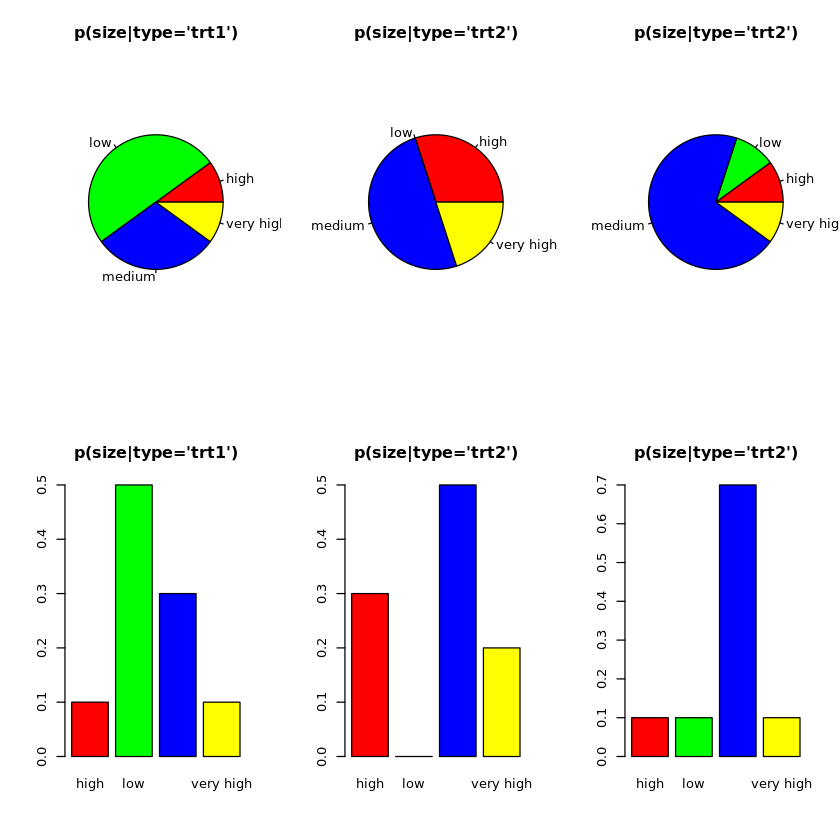

In [15]:
par(mfrow = c(2,3))  # Dimensions for how the plots are displayed
colours = c('red','green','blue','yellow')  # Colours used in the plots

# Pie charts
pie(prop.table(table(data), margin=1)[1,], main="p(size|type='trt1')", col=colours)
pie(prop.table(table(data), margin=1)[2,], main="p(size|type='trt2')", col=colours)
pie(prop.table(table(data), margin=1)[3,], main="p(size|type='trt2')", col=colours)

# Bar charts
barplot(prop.table(table(data), margin=1)[1,], main="p(size|type='trt1')", col=colours)
barplot(prop.table(table(data), margin=1)[2,], main="p(size|type='trt2')", col=colours)
barplot(prop.table(table(data), margin=1)[3,], main="p(size|type='trt2')", col=colours)

These are some ugly, clown-like looking plots. Perhaps look for more suitable colours.

#### 1.4.1 Plant Type Given the Size

Take note that here, the __columns sum to 1__, rather than the rows as was in the last case:

In [16]:
prop.table(table(data), margin=2)  # Plant type given the size - Conditional relative frequency table

      size
type        high       low    medium very high
  trt1 0.2000000 0.8333333 0.2000000 0.2500000
  trt2 0.6000000 0.0000000 0.3333333 0.5000000
  trt3 0.2000000 0.1666667 0.4666667 0.2500000

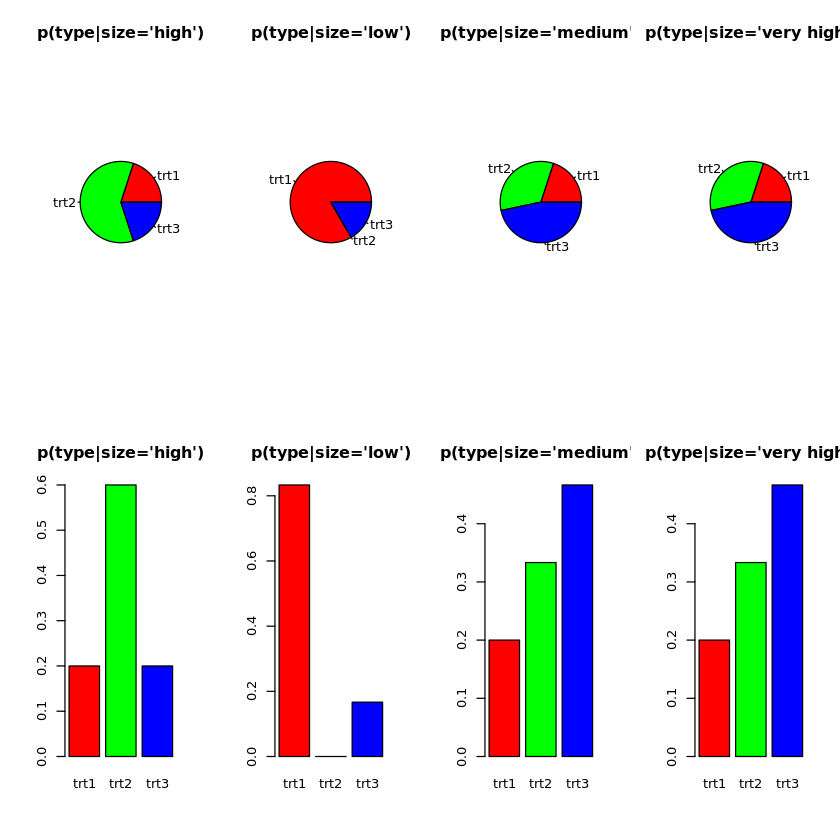

In [17]:
par(mfrow = c(2,4))  # Dimensions for how the plots are displayed
colours = c('red','green','blue')# Colours used in the plots

# Pie charts
pie(prop.table(table(data), margin=2)[,1], main="p(type|size='high')", col=colours)
pie(prop.table(table(data), margin=2)[,2], main="p(type|size='low')", col=colours)
pie(prop.table(table(data), margin=2)[,3], main="p(type|size='medium')", col=colours)
pie(prop.table(table(data), margin=2)[,3], main="p(type|size='very high')", col=colours)

# Barcharts
barplot(prop.table(table(data), margin=2)[,1], main="p(type|size='high')", col=colours)
barplot(prop.table(table(data), margin=2)[,2], main="p(type|size='low')", col=colours)
barplot(prop.table(table(data), margin=2)[,3], main="p(type|size='medium')", col=colours)
barplot(prop.table(table(data), margin=2)[,3], main="p(type|size='very high')", col=colours)

# 1.6 

You are now told that the __size__ classes correspond to the following __weight intervals__: 

    * Very low = [0,3.5]
    * low = [3.5,4.5]
    * medium= [4.5,5.5]
    * high= [5.5,6]
    * very high= [6,10]

Compute the approximate __mean weight__ and the approximate __conditional mean weight given that the plant type is trt1__.

### 1.6.1 Mean Weight

$$\bar{x} = \int x p(x) dx$$

* $p(x)$ is given by the conditional relative frequencies, calculated earlier.
* $x$ is the weight

In [18]:
# Define intervals
i_very_low=c(0,3.5); i_low=c(3.5,4.5); i_medium=c(4.5,5.5); i_high=c(5.5,6); i_very_high=c(6,10)

# Means of intervals
m_very_low=mean(i_very_low); m_low=mean(i_low); m_medium=mean(i_medium); m_high=mean(i_high); m_very_high=mean(i_very_high)

In [19]:
margin.table(table(data), margin=2)  # Marginal absolute frequency: plant size

size
     high       low    medium very high 
        5         6        15         4 

In [20]:
x = margin.table(table(data), margin=2)  # Marginal absolute frequency: plant size
row.names(x) = NULL  # Remove indices from the table ('high', 'low',...) and just get numbers
x

[1]  5  6 15  4

SUM( Mean of interval * # of points in that interval ) / N 

In [21]:
(x[1] * m_low + x[2] * m_medium + x[3] * m_high + x[4] * m_very_high) / sum(x)

[1] 5.608333

Thus, the estimated mean weight of the plants is given above as:

$$\bar{\text{w}} = 5.61$$

This value of the mean weight suggests that most of the plants fall within the 'high' size, which is in agreement with the relative frequency distributions for size.

### 1.6.2 Conditional Mean Weight given Plant Type

Compute the approximate conditional mean weight given that the plant type is trt1.

$$p(H|E)=\frac{p(E|H)p(H)}{p(E)}$$

$$p(\bar{w} | \text{type='trt1'})$$

Seek $p(\text{size}|\text{type})$

From the size, we can determine the weight

$p(\text{type='trt1'}) = \frac{1}{3}$


Below is a table of $p(\text{size}|\text{type})$

In [22]:
prop.table(table(data), margin=1)  # Size given the plant type - Conditional relative frequency table

      size
type   high low medium very high
  trt1  0.1 0.5    0.3       0.1
  trt2  0.3 0.0    0.5       0.2
  trt3  0.1 0.1    0.7       0.1

Therefore, multiply each element of the rows by the mean weight within their weight intervals - and sum them to get the mean weight conditioned on the plant type.

In [23]:
prop.table(table(data), margin=1)  # Size given the plant type - Conditional relative frequency table

      size
type   high low medium very high
  trt1  0.1 0.5    0.3       0.1
  trt2  0.3 0.0    0.5       0.2
  trt3  0.1 0.1    0.7       0.1

Recall the weight intervals, and the means calculated from those intervals previously:

In [24]:
# Define intervals
i_very_low=c(0,3.5); i_low=c(3.5,4.5); i_medium=c(4.5,5.5); i_high=c(5.5,6); i_very_high=c(6,10)

# Means of intervals
m_very_low=mean(i_very_low); m_low=mean(i_low); m_medium=mean(i_medium); m_high=mean(i_high); m_very_high=mean(i_very_high)

$$\bar{w}|\text{type} = \sum_{\text{size}} \bar{w}(\text{size}) f(\text{size|type})$$

In [25]:
0.1*m_high + 0.5*m_low + 0.3*m_medium + 0.1*m_high  # Mean weight, given that its a 'trt1' type
0.3*m_high + 0.0*m_low + 0.5*m_medium + 0.2*m_high  # Mean weight, given that its a 'trt2' type
0.1*m_high + 0.1*m_low + 0.7*m_medium + 0.1*m_high  # Mean weight, given that its a 'trt3' type

[1] 4.65

[1] 5.375

[1] 5.05

Thus, the approximate conditional mean weight given that the plant type is trt1 is: __4.65__.

$$(\hat{\bar{w}}|\text{type='trt1'})=4.65$$
$$(\hat{\bar{w}}|\text{type='trt2'})=5.38$$
$$(\hat{\bar{w}}|\text{type='trt3'})=5.05$$

## (Optional) Exercise 2 

Download now from the KEATS page the ﬁle ```plant_weight.txt```, which contains a different dataset where the variable weight have been recorded as a continuos variable. Redeﬁne classes intervals (to be labelled from very low to very high) so that all 5 of them are non-empty when binning this new weight data. Build a new dataset with the new binned variable and compute the marginal frequency table for size and the approximated mean. Compare it with the mean of the unbinned variable.


### 2.1 Load the Data

In [26]:
plant_weights = read.table("data/plant_weight.txt",header=TRUE)  # Load data
head(plant_weights)  # Peek at data

type,weight
trt3,4.17
trt3,5.58
trt3,5.18
trt3,6.11
trt3,4.50
trt3,4.61


### 1.2 Redeﬁne size Intervals

Redeﬁne the size intervals (to be labelled from very low to very high) so that all 5 of them are non-empty when binning this new weight data.

Previously:

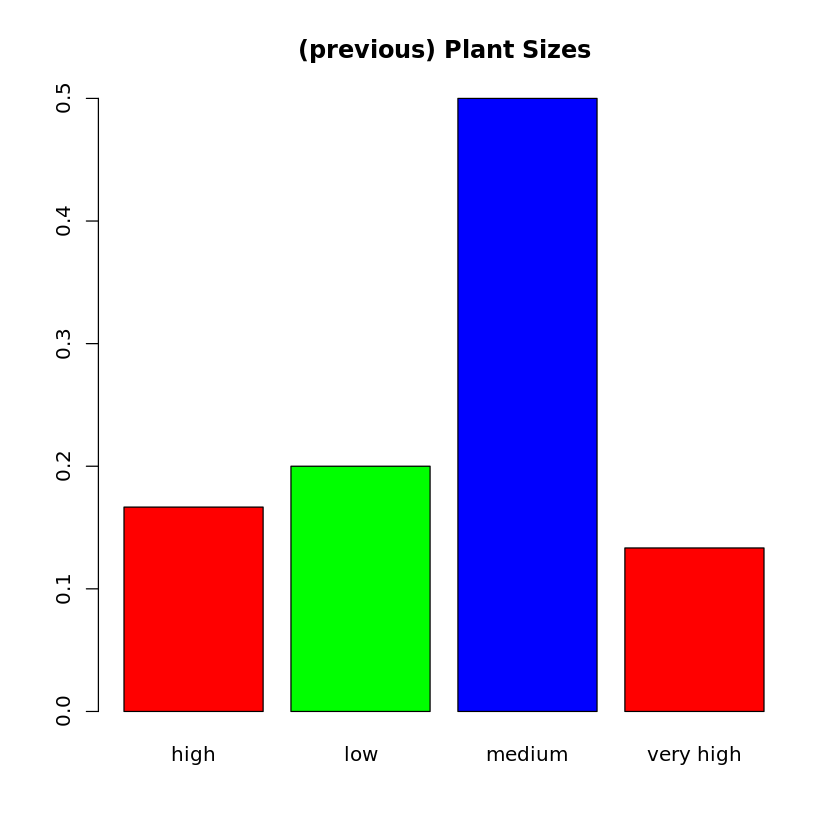

In [27]:
barplot(prop.table(margin.table(table(data), margin=2)), main='(previous) Plant Sizes', col=colours)  # Pie chart of plant size

We immediately note that there are only 4 classes in this previous dataset, and there are zero ```very low``` sized plants. Our task here is to divide the dataset into 5 classes, including the ```'very low``` size interval.

To achieve this, let us first determine the range of our dataset.

In [28]:
min(plant_weights$weight)

[1] 3.59

In [29]:
max(plant_weights$weight)

[1] 6.31

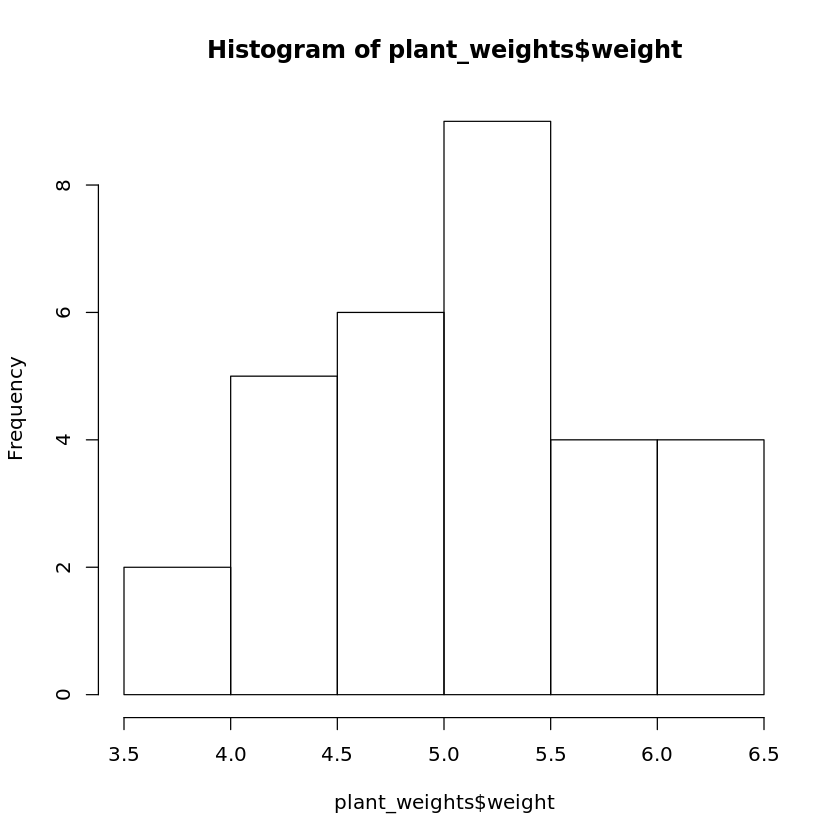

In [30]:
hist(plant_weights$weight)

We thus need to divide this region weight=3.59 --> weight =6.31 into 5 intervals (very low, low, medium, high, very high). We need to determine the __interval limits__ for each interval. Let's do this by balancing the dataset and __ensuring that each interval has the same amount of plants__. 

In [31]:
cbind(data, plant_weights)

type,size,type,weight
trt3,low,trt3,4.17
trt3,high,trt3,5.58
trt3,medium,trt3,5.18
trt3,very high,trt3,6.11
trt3,medium,trt3,4.50
trt3,medium,trt3,4.61
trt3,medium,trt3,5.17
trt3,medium,trt3,4.53
trt3,medium,trt3,5.33
trt3,medium,trt3,5.14
